In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #to build classification tree
from sklearn.tree import plot_tree # to draw classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw confusion matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
print(df)


     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [ ]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
df.isna().values.any() #mendeteksi keberadaan nilai kosong

False

In [ ]:
X = df.drop('output', axis=1).copy()
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y = df['output'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [ ]:
categorical_var = df.select_dtypes("object")

drop_var_cat = []
cat_var = []
for kol in categorical_var:
    num_cat = len(df[kol].unique())
    if num_cat > 10:
        drop_var_cat.append(kol)
    else:
        cat_var.append(kol)

print("##########--Data Kategorik--################")
print(cat_var)
print("##########--TOO MUCH VARIABLE--################")
print(drop_var_cat)

##########--Data Kategorik--################
[]
##########--TOO MUCH VARIABLE--################
[]


In [ ]:
# split data into training and predicting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

clf_dt = DecisionTreeClassifier(random_state=25)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
y_predict=clf_dt.predict(X_test)
y_predict

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confuse = confusion_matrix(y_test, y_predict)
confuse

array([[23,  9],
       [10, 34]])

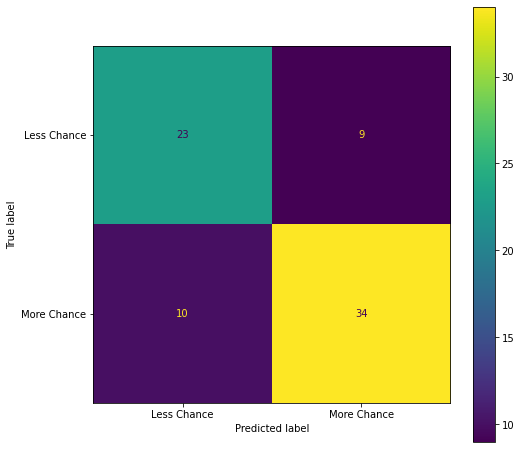

In [ ]:
classnames=['Less Chance', 'More Chance']
displaypohon=ConfusionMatrixDisplay(confusion_matrix=confuse,display_labels=classnames)

fig, ax = plt.subplots(figsize=(8,8))
displaypohon.plot(ax=ax)

In [ ]:
from sklearn.metrics import classification_report

hasil=classification_report(y_test,y_predict,target_names=classnames)
print(hasil)

              precision    recall  f1-score   support

 Less Chance       0.70      0.72      0.71        32
 More Chance       0.79      0.77      0.78        44

    accuracy                           0.75        76
   macro avg       0.74      0.75      0.74        76
weighted avg       0.75      0.75      0.75        76



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


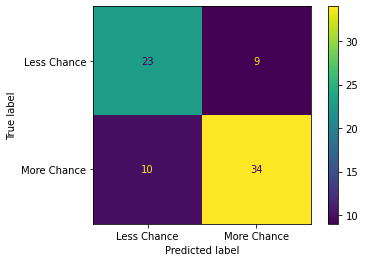

In [ ]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Less Chance", "More Chance"])

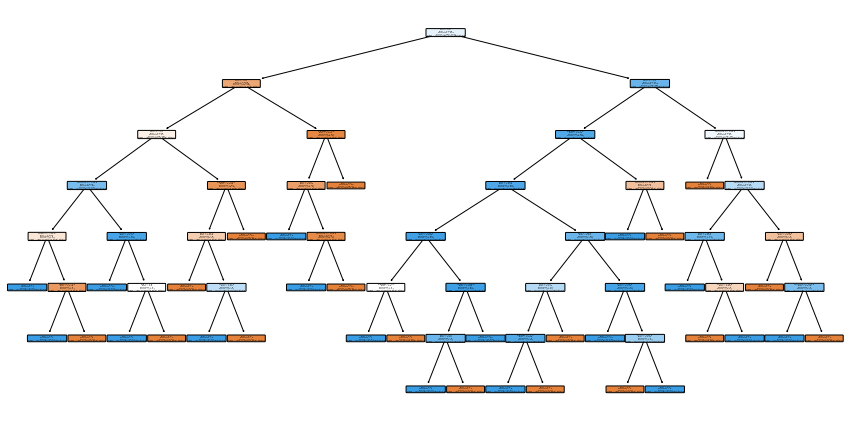

In [ ]:
# preliminary tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["less chance of heart attack", "more chance of heart attack"],
          feature_names=X.columns);

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clfs.append(clf_dt)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.165062712171536


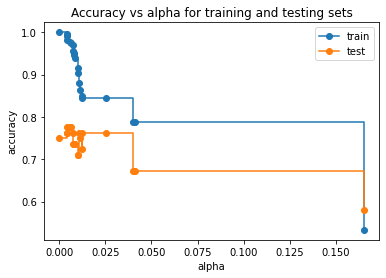

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

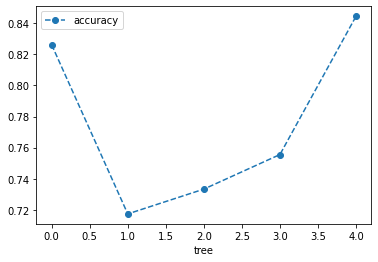

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=25, ccp_alpha=0.013)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

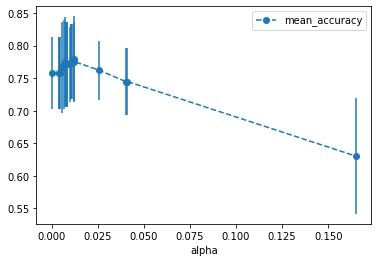

In [ ]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',
                  y= 'mean_accuracy',
                  yerr = 'std',
                  marker= 'o',
                  linestyle='--')

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.012) & (alpha_results['alpha'] < 0.013)]


,alpha,mean_accuracy,std
15,0.012237,0.779710,0.065382
16,0.012337,0.775362,0.061304


In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.012) & (alpha_results['alpha'] < 0.013)]['alpha']
ideal_ccp_alpha

15    0.012237
16    0.012337
Name: alpha, dtype: float64

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=25, ccp_alpha=0.012237)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


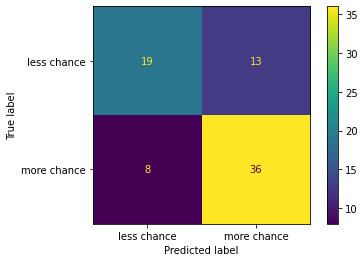

In [ ]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["less chance","more chance"])

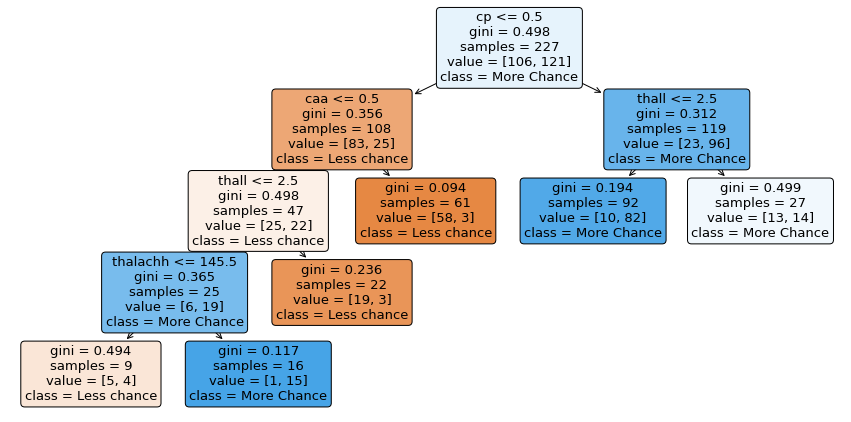

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["Less chance","More Chance"], feature_names=X.columns);